# Homework 7.1 - Coding

This is the coding portion of the homework assignment for Section 7.1 (which, in this case, is the entire assignment)

In [169]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, chi2

## Problem 7.1 

Let $X = Z^2$, where $Z \sim \mathcal{N}(0,1)$ is the standard normal. The random variable $X$ has a *chi-squared* distribution with 1 degree of freedom.

### Part (i)

Compute and plot the p.d.f of $X$ using both Monte Carlo methods and standard numerical packages, as follows:

1. Define a function `chi2_samples_mc()`, which accepts a numpy random-number generator `rng` and an integer `n`, and returns `n` samples from $X$ in a numpy array. 

   Do this by sampling from the standard normal distribution $Z$, and transforming the samples appropriately.

In [170]:
def chi2_samples_mc(rng: np.random.Generator, n: int) -> np.ndarray:
    """Gets n samples from the chi-squared distribution X = Z^2.
    
    This is done by monte-carlo sampling from the sandard normal distribution Z,
    and transforming the samples appropriately.
    
    Args:
        rng (np.random.Generator) - A random number generator from numpy, which
            should be used to sample from any distributions
        n (int) - The number of samples (10^k) to return
    
    Returns:
        array - The n samples requested
    """
    
    z = rng.standard_normal(size=n)
    return z * z

2. In the following code cell, write some code that does the following for $k = 2, 4, 6$:
   
   (a) Get $10^k$ samples of the chi-squared distribution (with one degree of freedom) $X$ using the monte-carlo function `chi2_samples_mc()`

   (b) Plot a _normalized_ histogram of these samples (this is the Monte-Carlo approximation of the p.d.f) - experiment with the number of bins to use to get the most accurate representation. 

   (c) On the _same axis_, plot the actual p.d.f of the chi-squared distribution with one degree of freedom $X$, using the standard numerical package `scipy.stats`
   
   (d) Include a title for your plot that describes the number of samples being used.

   (e) Show your plot

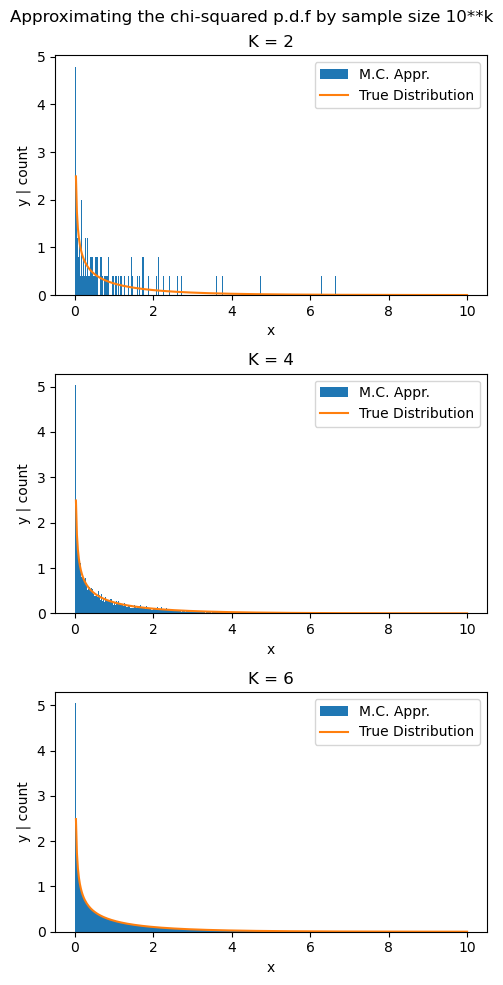

In [171]:
bins = np.linspace(0, 10, 400)
plt.figure()
rng = np.random.default_rng()
for k, subplot in zip([2, 4, 6], [(311),(312),(313)]):

    n = 10**k
    samples = chi2_samples_mc(rng, n)

    plt.subplot(subplot)
    plt.hist(samples, bins, density=True, label="M.C. Appr.")
    plt.plot(bins, chi2.pdf(bins, 1), label = "True Distribution")
    plt.xlabel("x")
    plt.ylabel("y | count")
    plt.title(f"K = {k}")
    plt.legend()

plt.gcf().set_size_inches(5, 10)
plt.suptitle("Approximating the chi-squared p.d.f by sample size 10**k")
plt.tight_layout()

### Part (ii)

Compute the c.d.f $F_X(x)$ for $x \in \{0.5, 1.0, 1.5 \}$ using both Monte Carlo and standard techniques, as follows:

1. Define a function `chi2_cdf_mc()` which accepts a numpy random-number generator `rng` and an integer `n`, and a floating-point number `x` at which to evaluate the c.d.f, and does the following: 

   (a) Samples `n` times from the chi-squared distribution using the function `chi2_samples_mc()`
   
   (b) Computes and returns the percentage of samples which are below the given threshold `x` (this is the estimate for the c.d.f)

In [172]:
def chi2_cdf_mc(rng: np.random.Generator, n: int, x: float) -> float | np.floating:
    """Estimates the cdf of a chi-squared distribution with 1 degree of 
    freedom X, at a given point x.
    
    Args:
        rng (np.random.Generator) - A random number generator from numpy, which
            should be used to sample from any distributions
        n (int) - The number of samples to use
        x (float) - The point x at which to evaluate the c.d.f F_X(x) of X

    Returns:
        float - The estimate for the c.d.f of X
    """
    arr = chi2_samples_mc(rng, n)
    return np.mean(arr <= x)


2. In the following code cell, write some code that does the following for $k = 2, 4, 6$ and for $x = 0.5, 1, 1.5$:
   
   (a) Use `chi2_cdf_mc()` to get a Monte-Carlo estimate of the c.d.f of $X$ at $x$

   (b) Get the _actual_ value of the c.d.f of $X$ using the standard numerical package `scipy.stats`
   
   (c) Display both of these numbers to the screen for comparison (make sure to label which number is which)

In [173]:
for k in [2, 4, 6]:
    print(f"\nk = {k}")
    for x in [0.5, 1, 1.5]:
        print(f"x = {x}")
        n = 10**k
        appx = np.round(chi2_cdf_mc(rng, n, x), 3)
        true = np.round(chi2.cdf(x, df=1), 3)
        print(f"Approximate: {appx}")
        print(f"True:        {true}")


k = 2
x = 0.5
Approximate: 0.5
True:        0.52
x = 1
Approximate: 0.73
True:        0.683
x = 1.5
Approximate: 0.77
True:        0.779

k = 4
x = 0.5
Approximate: 0.53
True:        0.52
x = 1
Approximate: 0.68
True:        0.683
x = 1.5
Approximate: 0.782
True:        0.779

k = 6
x = 0.5
Approximate: 0.52
True:        0.52
x = 1
Approximate: 0.683
True:        0.683
x = 1.5
Approximate: 0.779
True:        0.779


### Part (iii)

Compute the expected value $\mathbb{E}[X]$ using both Monte-Carlo methods and standard numerical packages, as follows:

1. Define a function `chi2_cdf_mc()` which accepts a numpy random-number generator `rng` and an integer `n`, and does the following:

   (a) Samples `n` times from the chi-squared distribution using the function `chi2_samples_mc()`
   
   (b) Returns the sample mean (this is the Monte-Carlo estimate for the expected value of $X$)



In [174]:
def chi2_mean_mc(rng: np.random.Generator, n: int) -> float | np.floating:
    """Estimates the mean/expected value of a chi-squared distribution
    with 1 degree of freedom X
    
    Args:
        rng (np.random.Generator) - A random number generator from numpy, which
            should be used to sample from any distributions
        n (int) - The number of samples to use

    Returns:
        float - The estimate for the mean/expected value of X
    """
    
    return np.mean(chi2_samples_mc(rng, n))

2. In the following code cell, write some code that does the following for $k = 2, 4, 6$:
   
   (a) Use `chi2_mean_mc()` to get a Monte-Carlo estimate of the expected value of $X$.

   (b) Get the _actual_ value of the mean of $X$ using the standard numerical package `scipy.stats`
   
   (c) Display both of these numbers to the screen for comparison (make sure to label which number is which)

In [175]:
for k in [2, 4, 6]:
    print(f"\nk = {k}")
    n = 10**k
    appx = np.round(chi2_mean_mc(rng, n), 5)
    true = np.round(chi2.mean(df= 1), 5)
    print(f"Approximate: {appx}")
    print(f"True:        {true}")


k = 2
Approximate: 1.10922
True:        1.0

k = 4
Approximate: 1.02715
True:        1.0

k = 6
Approximate: 0.99867
True:        1.0


### Part (iv)

Compute the variance $\operatorname{Var}(X)$ using both Monte-Carlo methods and standard numerical packages, as follows:

1. Define a function `chi2_var_mc()` which accepts a numpy random-number generator `rng` and an integer `n`, and does the following:

   (a) Samples `n` times from the chi-squared distribution using the function `chi2_samples_mc()`
   
   (b) Computes and returns the (unbiased) sample variance of $X$ as a floating-point number (this is the Monte-Carlo estimate for the variance of $X$).

In [176]:
def chi2_var_mc(rng: np.random.Generator, n: int) -> float | np.floating:
    """Estimates the variance of a chi-squared distribution
    with 1 degree of freedom X
    
    Args:
        rng (np.random.Generator) - A random number generator from numpy, which
            should be used to sample from any distributions
        n (int) - The number of samples to use

    Returns:
        float - The estimate for the variance of X
    """
    arr = chi2_samples_mc(rng, n)
    mu = np.mean(arr)
    unbiased_var = (1/(n - 1)) * sum([(x - mu)**2 for x in arr])

    return unbiased_var

2. In the following code cell, write some code that does the following for $k = 2, 4, 6$:
   
   (a) Use `chi2_var_mc()` to get a Monte-Carlo estimate of the variance of $X$.

   (b) Get the _actual_ value of the variance of $X$ using the standard numerical package `scipy.stats`
   
   (c) Display both of these numbers to the screen for comparison (make sure to label which number is which)

In [177]:
for k in [2, 4, 6]:
    print(f"\nk = {k}")
    n = 10**k
    appx = np.round(chi2_var_mc(rng, n), 3)
    true = np.round(chi2.var(df= 1), 3)
    print(f"Approximate: {appx}")
    print(f"True:        {true}")


k = 2
Approximate: 2.199
True:        2.0

k = 4
Approximate: 1.96
True:        2.0

k = 6
Approximate: 2.006
True:        2.0


---

## Problem 7.2 

Write code to approximate $\pi$ using the Monte Carlo methods in the reading.

To do this, write a function `approximate_pi_mc()` which approximates $\pi$ by sampling pairs from the uniform distribution on $[-1,1] \times [-1,1]$ and counting the proportion that lie inside the circle $x^2 + y^2 \leq 1$. 

Your function should accept (1) a numpy random-number generator `rng` and (2) an integer `n` represnting the number of samples to use.

It should return (1) a floating-point number representing the approximation of $\pi$, and (2) the approximate standard error of this estimate (where we assume the $i$'th sample $x_i$ is $1$ if it is in the unit circle, and $0$ if it is not in the unit circle).


In [178]:
def approximate_pi_mc(
    rng: np.random.Generator,
    n: int
) -> tuple[float | np.floating, float | np.floating]:
    """Approximate the value of pi using the Monte Carlo
    method described above.
    
    Args:
        rng (np.random.Generator) - A random number generator from numpy, which
            should be used to sample from any distributions
        n (int) - The number of samples to use
    
    Returns:
        float - The monte-carlo approximation of pi 
        float - The approximate standard error.
    """
    x_samples = rng.uniform(-1, 1, n)
    y_samples = rng.uniform(-1, 1, n)

    # turn into a list of 1s and 0s.  1 if inside the circle
    indicators = (x_samples**2 + y_samples**2 <= 1).astype(float)

    percent = np.mean(indicators)

    unbiased_var = (1/(n-1)) * np.sum([(indicators - percent) ** 2])

    std_err = np.sqrt(unbiased_var / n)

    area = 4

    return percent*area, std_err*area


Now, in the following code cell, write some code to approximate $\pi$ using $10^k$ samples for $k \in \{2, 4, 6\}$. Print out the approximation, as well as the approximate standard error, for each of these trials (make sure to label which number is which).

In [179]:
rng = np.random.default_rng()

for k in [2, 4, 6]:
    print(f"\nk = {k}")
    n = 10**k
    area, std_err = approximate_pi_mc(rng, n)
    appx = np.round(area, 5)
    true = np.round(std_err, 5)
    print(f"Area:           {appx}")
    print(f"Standard Error: {true}")


k = 2
Area:           3.12
Standard Error: 0.16653

k = 4
Area:           3.1348
Standard Error: 0.01647

k = 6
Area:           3.14235
Standard Error: 0.00164


---

## Problem 7.3

There are at least two different Monte Carlo methods you could use to approximate the area under the curve $y = h(x) = e^{\cos(x^2)}$ for $x \in [0,2]$.

### Part (i)

Write a function `integral_1d_mc()` that approximates 

$$\int_0^2 h(x) dx = 2 \int_0^2 h(x) f_{\operatorname{Uniform}}(x) dx = 2 \mathbb{E}[h \circ X] \quad \text{ where } X \sim \operatorname{Uniform}[0,2]$$

by sampling from the 1-d uniform distribution $\operatorname{Uniform}[0,2]$ and applying the appropriate transformation. 

Your function should accept (1) a numpy random-number generator `rng` and (2) an integer `n` represnting the number of samples to use.

Your function should return (1) a floating-point number representing the approximate value of the integral, and (2) the approximate standard error (as presented in the text)

In [180]:
def integral_1d_mc(
    rng: np.random.Generator,
    n: int
) -> tuple[float | np.floating, float | np.floating]:
    """Approximate the value of the desired integral
    using 1-d Monte-Carlo sampling.
    
    Args:
        rng (np.random.Generator) - A random number generator from numpy, which
            should be used to sample from any distributions
        n (int) - The number of samples to use
    
    Returns:
        float - The monte-carlo approximation of the integral
        float - The approximate standard error.
    """
    samples = rng.uniform(0, 2, n)
    h_of_samples = np.exp(np.cos(samples**2))
    mu_hat = np.mean(h_of_samples)
    estimate = 2 * mu_hat

    unbiased_var = (1/(n-1) * np.sum((h_of_samples - mu_hat) ** 2))

    std_err = 2*np.sqrt(unbiased_var / n)

    return estimate, std_err



Now, in the following code cell, call the above function with $n \geq 10^5$ to approximate the integral. Display the approximation and the (approximate) standard error to the screen (make sure to label which one is which). 

In [181]:
rng = np.random.default_rng()

for k in [2, 4, 6]:
    print(f"\nk = {k}")
    n = 10**k
    area, std_err = integral_1d_mc(rng, n)
    appx = np.round(area, 5)
    true = np.round(std_err, 5)
    print(f"Area:           {appx}")
    print(f"Standard Error: {true}")


k = 2
Area:           3.37622
Standard Error: 0.1939

k = 4
Area:           3.25962
Standard Error: 0.01887

k = 6
Area:           3.22264
Standard Error: 0.00189


### Part (ii)

Estimate the same integral/area under the curve by taking a 2d-sample.

To do this, write a function `integral_2d_mc()` which takes the 2d-sample

$$Z \sim \operatorname{Uniform}([0,2]) \times \operatorname{Uniform}([0,b]) \quad \text{ where } b \geq \max_{x \in [0,2]} h(x) = \max_{x \in [0,2]} e^{\cos(x^2)}$$

and then counts (and scaling appropriately) the samples that lie under the curve to get the final answer.

Your function should accept (1) a numpy random-number generator `rng`, (2) an integer `n` represnting the number of samples to use, and (3) a floating-point number `b`, which is an upper bound on the $y$-coordinate of the samples that satisfies the criterion listed above.

Your function should return (1) a floating-point number representing the approximate value of the integral, and (2) the approximate standard error (as presented in the text) (where $x_i$ is $1$ if it is under the curve, and $0$ if it is not).

In [182]:
def integral_2d_mc(
    rng: np.random.Generator,
    n: int, 
    b: float,
) -> tuple[float | np.floating, float | np.floating]:
    """Approximate the value of the desired integral
    using 2-d Monte-Carlo sampling.
    
    Args:
        rng (np.random.Generator) - A random number generator from numpy, which
            should be used to sample from any distributions
        n (int) - The number of samples to use
        b (float) - The upper bound on the y-samples to use
            (should be >= h(x) on [0,2])
    
    Returns:
        float - The monte-carlo approximation of the integral
        float - The approximate standard error.
    """
    x_sample = rng.uniform(0, 2, n)
    b = np.exp(1) # the max of cos(x^2) is 1, so the max of e^cos(x^2)) is e
    y_sample = rng.uniform(0, b, n)

    indicators = np.array(y_sample <= np.exp(np.cos(x_sample**2))).astype(float)

    percent = np.mean(indicators)
    unbiased_var = (1/(n-1))*np.sum((indicators - percent)**2)

    std_err = np.sqrt(unbiased_var / n)

    area = 2*b

    return percent*area, std_err*area
    

Now, in the following code cell, call the above function with $n \geq 5 \times 10^4$ to approximate the integral. Display the approximation and the (approximate) standard error to the screen (make sure to label which one is which). 

In [183]:
rng = np.random.default_rng()
integral_2d_mc(rng, 5*(10**4), 2)

(3.227144186746578, 0.011941740077898855)

Now, in the following markdown cell, write a sentence or two comparing the results of the two methods.

**Method Comparison**: _The first method samples from the uniform distribution, then plugs those into h(x), with some slight adjustements.  The second method looks at the area of random points under the curve and calculates the area under the curve from the percentage of points that land underneath it.  The first seems more computationally reasonable if it's an option._

---

## Problem 7.5

Consider a game where you roll a fair four-sided die with sides labeled 1, 2, 3, and 4. 
You win $1 if the die shows 1 or 2, you win $2 if the die shows 3, and you lose $1 if the die shows 4.

Using Monte Carlo simulation methods, write a function `four_sided_die_game_mc()` that estimates the probability that your winnings will be negative after 10 rolls of the die.

Your function should accept (1) a numpy random-number generator `rng` and (2) an integer `n` represnting the number of samples to use.

Your function should return (1) the approximate probability of this event occuring, and (2) the approximate value of the standard error.

In [184]:
def four_sided_die_game_mc(
    rng: np.random.Generator,
    n: int
) -> tuple[float | np.floating, float | np.floating]:
    """Approximates the probability that your winnings are
    negative after 10 die rolls.
    
    Args:
        rng (np.random.Generator) - A random number generator from numpy, which
            should be used to sample from any distributions
        n (int) - The number of samples to use
    
    Returns:
        float - The monte-carlo approximation of this probability
        float - The approximate standard error.
    """
    # simulate n games of 10 rolls each
    rolls = rng.integers(1, 4, endpoint=True, size=(n, 10))
    
    # compute winnings for each roll
    winnings = np.where((rolls == 1) | (rolls == 2), 1, np.where(rolls == 3, 2, -1))
    
    # total winnings per game
    total_winnings = winnings.sum(axis=1)
    
    # probability winnings are negative
    prob_neg = np.mean(total_winnings < 0)
    
    # standard error for a proportion
    se = np.sqrt(prob_neg * (1 - prob_neg) / n)
    
    return prob_neg, se

Respond in the following markdown cell: How many samples should you use? Why?

**Answer**: _15,000 or more._

**Justification**: _We want a reliable estimate.  15,000 samples gives a SE of 0.00086, so we can trust our estimate up to the thousandths place, giving us 2 significant digits.  However, as this is a computationally cheap problem, 1000000 or more is not unreasonable._

In the following code cell, run `four_sided_die_game_mc()` with this number of samples, and display the results (and approximate standard error) to the screen.

In [185]:
rng = np.random.default_rng()

print(four_sided_die_game_mc(rng, 15000))


(0.0144, 0.0009727157858285225)


---

## Problem 7.6

We look to estimate the value of the integral
$$\int_3^{\infty} e^{-\frac{x^2}{2}} dx$$
by sampling from various distributions.

Write a function `integral_7_6_mc()` which estimates the value of this integral by sampling $10^5$ times from an indicated Normal distribution.

Your function should take as input:
1. A numpy random-number generator `rng`, and
2. A string `dist`, which will either be `'standard_normal'` – indicating to sample from $\mathscr{N}(0, 1)$ – or `'off_centered_normal'` – indicating to sample from $\mathscr{N}(3, 1)$. 

Your function should return two floating-point numbers: 
1. The resulting Monte Carlo estimate for this integral, and
2. The estimated standard error

In [186]:
def integral_7_6_mc(
    rng: np.random.Generator,
    dist: str
) -> tuple[float | np.floating, float | np.floating]:
    """Estimates the integral in Problem 7.6 using Monte Carlo methods.
    
    Args:
        rng (np.random.Generator) - A numpy random number generator
            (usually generated from np.random.default_rng()). This should
            be used to sample from any distributions 
        dist (str) - Indicates which distribution to sample from.
            Options are 'standard_normal' (N(0,1)) or 'off_centered_normal' (N(3,1))
    
    Returns:
        float - The Monte Carlo estimate for this integral
        float - The approximate standard error of this approximation    
    """
    N = 100_000
    
    if dist == 'standard_normal':
        # Sample from N(0,1)
        X = rng.normal(loc=0, scale=1, size=N)

        weights = np.sqrt(2 * np.pi) * (X >= 3)
    elif dist == 'off_centered_normal':
        # Sample from N(3,1)
        X = rng.normal(loc=3, scale=1, size=N)

        weights = np.sqrt(2 * np.pi) * np.exp(-(X**2 - (X-3)**2)/2) * (X >= 3)
    
    estimate = np.mean(weights)
    stderr = np.std(weights, ddof=1) / np.sqrt(N)
    
    return estimate, stderr

Run the above function in the following code cell, once for each of the two proposal distributions, and print the results to the screen (indicating clearly which number/distribution/etc. is which)

In [187]:
rng = np.random.default_rng()
print('standard_normal estimate, stderr:')
print(integral_7_6_mc(rng, 'standard_normal'))

print('\noff-centered estimate, stderr:')
print(integral_7_6_mc(rng, 'off_centered_normal'))

standard_normal estimate, stderr:
(0.0033338156052592303, 0.00028888761808209884)

off-centered estimate, stderr:
(0.0033787235569572734, 1.964900561016137e-05)


---

IMPORTANT: Please "Restart and Run All" and ensure there are no errors. Then, submit this .ipynb file to Gradescope.